# Lego Analysis

Small analysis of Lego Dataset - mostly to exercise how to combine data and retrieve informations. \
Data from https://rebrickable.com/downloads/
## 💪 Challenge
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year?
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.
4. Similar as 3 - what was average parts per set in 1950 and what is in 2020?
5. What are the 5 most popular colors used in Lego parts?
6. What proportion of Lego parts are transparent?
8. What are the 5 rarest lego bricks?
9. When first transparent bricks were used? What colors became transparent through time?
10. Summarize your findings.


In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Prepare colors_table

In [2]:
colors_table = pd.read_csv('data\colors.csv.gz')
print(colors_table.head())
print('shape:', colors_table.shape)
print('unique names:', colors_table['name'].nunique())

   id            name     rgb is_trans
0  -1       [Unknown]  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
shape: (267, 4)
unique names: 267


In [3]:
colors_table['is_trans_2'] = colors_table['is_trans'] == 't'
colors_table.drop('is_trans', axis='columns', inplace=True)
colors_table.rename(columns={'is_trans_2': 'is_trans'}, inplace=True)
colors_table.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


In [4]:
print('unique names:', colors_table['is_trans'].unique())

unique names: [False  True]


In [5]:
colors_table.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


Prepare elements

In [6]:
elements_table = pd.read_csv('data\elements.csv.gz')
print(elements_table.head())
print('shape:', elements_table.shape)

   element_id       part_num  color_id  design_id
0     6443403  2277c01pr0009         1     2277.0
1     4566309           2564         0     2564.0
2     4275423          53657      1004    53657.0
3     6194308          92926        71    28967.0
4     6229123          26561         4    26561.0
shape: (95282, 4)


In [7]:
elements_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95282 entries, 0 to 95281
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   element_id  95282 non-null  int64  
 1   part_num    95282 non-null  object 
 2   color_id    95282 non-null  int64  
 3   design_id   70649 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


## QUESTION 1:
1. What is the average number of Lego sets released per year?


In [8]:
sets_table = pd.read_csv('data\sets.csv.gz')
sets_table.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [9]:
sets_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23873 entries, 0 to 23872
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    23873 non-null  object
 1   name       23873 non-null  object
 2   year       23873 non-null  int64 
 3   theme_id   23873 non-null  int64 
 4   num_parts  23873 non-null  int64 
 5   img_url    23873 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [10]:
# more for questions 2 & 3
sets_table.loc[sets_table['num_parts'] == 0].shape

(5876, 6)

In [11]:
# more for questions 2 & 3
np.sort(sets_table['num_parts'].unique())

array([    0,     1,     2, ...,  9987, 10001, 11695], dtype=int64)

In [12]:
sets_table_year = sets_table.groupby('year').agg(Count=('theme_id', 'count')).sort_values(by='year').reset_index()
sets_table_year

,year,Count
0,1949,5
1,1950,6
2,1953,4
3,1954,14
4,1955,39
...,...,...
70,2021,1206
71,2022,1186
72,2023,1128
73,2024,1004


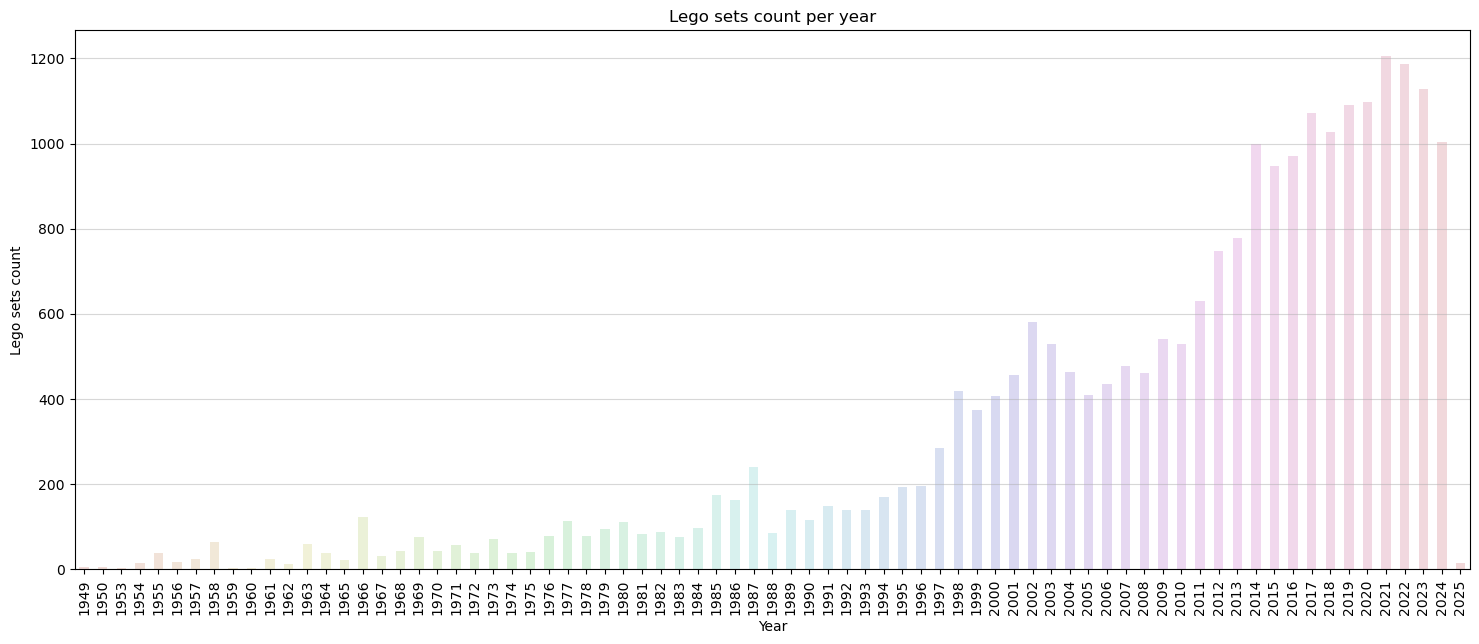

In [13]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(18,7))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_table_year, x='year', y='Count', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_table_year['year']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Lego sets count per year')
ax.set_ylabel('Lego sets count')
ax.set_xlabel('Year')
plt.show()

In [14]:
sets_table_year.loc[sets_table_year['year'] < 1960, 'decade'] = 1950 
for decade in range(1960, 2020, 10):
    sets_table_year.loc[np.logical_and(sets_table_year['year'] >= decade, sets_table_year['year'] < decade + 10), 'decade'] = decade 
sets_table_year.loc[sets_table_year['year'] >= 2020, 'decade'] = 2020 
sets_table_year.head()

,year,Count,decade
0,1949,5,1950.0
1,1950,6,1950.0
2,1953,4,1950.0
3,1954,14,1950.0
4,1955,39,1950.0


In [15]:
sets_table_year['decade'].unique()

array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.])

In [16]:
sets_tables_decade = sets_table_year.groupby('decade').agg(Count=('Count', 'sum')).sort_values(by='decade').reset_index()
sets_tables_decade['decade'] = sets_tables_decade['decade'].astype(int)
sets_tables_decade

,decade,Count
0,1950,179
1,1960,426
2,1970,652
3,1980,1252
4,1990,2177
5,2000,4761
6,2010,8790
7,2020,5636


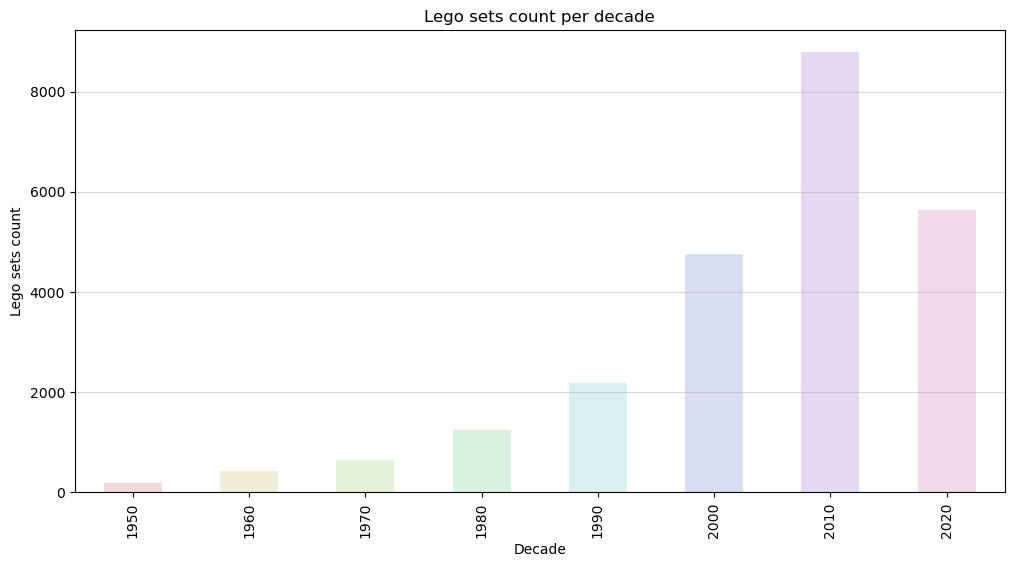

In [17]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_tables_decade, x='decade', y='Count', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_tables_decade['decade']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Lego sets count per decade')
ax.set_ylabel('Lego sets count')
ax.set_xlabel('Decade')
plt.show()

## QUESTION 2:
2. What is the average number of Lego parts per year?


In [18]:
inventories_df = pd.read_csv('data\inventories.csv.gz')
inventories_df.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [19]:
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40462 entries, 0 to 40461
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       40462 non-null  int64 
 1   version  40462 non-null  int64 
 2   set_num  40462 non-null  object
dtypes: int64(2), object(1)
memory usage: 948.5+ KB


In [20]:
inventories_df.loc[inventories_df['version'] != 1].head()

,id,version,set_num
10601,16490,2,6515-1
10659,16878,2,8030-1
10742,17793,2,76081-1
10743,17799,2,214.6-1
10747,17848,2,421-2


In [21]:
inventories_df.loc[np.logical_and(inventories_df['version'] == 1, inventories_df['set_num'] == '421-2')].head()

,id,version,set_num
9138,14143,1,421-2


In [22]:
inventory_parts_df = pd.read_csv('data\inventory_parts.csv.gz')
inventory_parts_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c04,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48391,0,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
3,1,48864c01,25,1,f,NaN
4,1,stickerupn0077,9999,1,f,NaN


In [23]:
inventory_parts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286599 entries, 0 to 1286598
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   inventory_id  1286599 non-null  int64 
 1   part_num      1286599 non-null  object
 2   color_id      1286599 non-null  int64 
 3   quantity      1286599 non-null  int64 
 4   is_spare      1286599 non-null  object
 5   img_url       1279381 non-null  object
dtypes: int64(3), object(3)
memory usage: 58.9+ MB


In [24]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 17848]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
532889,17848,3004,4,8,f,https://cdn.rebrickable.com/media/parts/elemen...
532890,17848,3005,4,6,f,https://cdn.rebrickable.com/media/parts/elemen...
532891,17848,3008,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...
532892,17848,3009,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...
532893,17848,3010,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...


In [25]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 14143]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
448074,14143,3004,14,8,f,https://cdn.rebrickable.com/media/parts/elemen...
448075,14143,3005,14,6,f,https://cdn.rebrickable.com/media/parts/elemen...
448076,14143,3008,14,2,f,https://cdn.rebrickable.com/media/parts/elemen...
448077,14143,3009,14,2,f,https://cdn.rebrickable.com/media/parts/elemen...
448078,14143,3010,14,2,f,https://cdn.rebrickable.com/media/parts/elemen...


In [26]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 14143, 'quantity'].sum()

20

In [27]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 17848, 'quantity'].sum()

20

So it looks that version is different if the set was inventoried more than once. So versions > 1 should be excluded from further analysis.

In [28]:
parts_per_set_year_df = inventory_parts_df.merge(inventories_df, left_on='inventory_id', right_on='id')
parts_per_set_year_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url,id,version,set_num
0,1,48379c04,72,1,f,https://cdn.rebrickable.com/media/parts/photos...,1,1,7922-1
1,1,48391,0,1,f,https://cdn.rebrickable.com/media/parts/photos...,1,1,7922-1
2,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...,1,1,7922-1
3,1,48864c01,25,1,f,NaN,1,1,7922-1
4,1,stickerupn0077,9999,1,f,NaN,1,1,7922-1


In [29]:
parts_per_set_year_df.drop(columns=['id'], inplace=True)
parts_per_set_year_df = parts_per_set_year_df.loc[parts_per_set_year_df['version'] == 1]
parts_per_set_year_df.drop(columns=['version'], inplace=True)

In [30]:
parts_per_set_year_df_2 = parts_per_set_year_df.groupby('set_num').agg(Parts_Count=('quantity', 'sum'))
parts_per_set_year_df_2.head()

,Parts_Count
set_num,
0003977811-1,1
001-1,43
0012-1,2
0013-1,2
0014-1,2


In [31]:
parts_per_set_year_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174448 entries, 0 to 1286447
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   inventory_id  1174448 non-null  int64 
 1   part_num      1174448 non-null  object
 2   color_id      1174448 non-null  int64 
 3   quantity      1174448 non-null  int64 
 4   is_spare      1174448 non-null  object
 5   img_url       1167928 non-null  object
 6   set_num       1174448 non-null  object
dtypes: int64(3), object(4)
memory usage: 71.7+ MB


In [32]:
np.sort(inventory_parts_df['part_num'].unique())

array(['003381', '003383', '003402', ..., 'wood03', 'wood04',
       'znapupn0005'], dtype=object)

In [33]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '60287-1', 'quantity'].sum()

146

In [34]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '60287-1']

,inventory_id,part_num,color_id,quantity,is_spare,img_url,set_num
868950,80991,11214,72,2,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1
868951,80991,11458,71,2,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1
868952,80991,15573,4,4,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1
868953,80991,18671,72,2,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1
868954,80991,22885,19,2,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1
...,...,...,...,...,...,...,...
869023,80991,91988,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1
869024,80991,93606,4,1,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1
869025,80991,98138,47,2,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1
869026,80991,98138,47,1,t,https://cdn.rebrickable.com/media/parts/elemen...,60287-1


In [35]:
parts_per_set_year_df.loc[(parts_per_set_year_df['set_num'] == '60287-1') & (parts_per_set_year_df['is_spare'] == 't'), 'is_spare'].count()

6

In [36]:
sets_table.loc[(sets_table['set_num'] == '60287-1')]

,set_num,name,year,theme_id,num_parts,img_url
12594,60287-1,Tractor,2021,57,148,https://cdn.rebrickable.com/media/sets/60287-1...


In [37]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '10782-1', 'quantity'].sum()

101

In [38]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '10782-1']

,inventory_id,part_num,color_id,quantity,is_spare,img_url,set_num
987065,120153,10126,10,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987066,120153,10127,10,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987067,120153,11089,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987068,120153,11458,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987069,120153,15535,25,4,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
...,...,...,...,...,...,...,...
987121,120153,92926,72,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987122,120153,93273,85,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987123,120153,93273,19,2,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987124,120153,99207,1,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1


In [39]:
sets_table.loc[(sets_table['set_num'] == '10782-1')]

,set_num,name,year,theme_id,num_parts,img_url
779,10782-1,Hulk vs. Rhino Truck Showdown,2022,755,110,https://cdn.rebrickable.com/media/sets/10782-1...


In [40]:
inventories_df.loc[(inventories_df['set_num'] == '10782-1')]

,id,version,set_num
31217,120153,1,10782-1


In [41]:
parts_per_set_year_df.loc[(parts_per_set_year_df['set_num'] == '10782-1') & (parts_per_set_year_df['is_spare'] == 't')]

,inventory_id,part_num,color_id,quantity,is_spare,img_url,set_num
987079,120153,30153,36,1,t,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987093,120153,33078,4,1,t,https://cdn.rebrickable.com/media/parts/elemen...,10782-1


In [42]:
parts_per_set_year_df = parts_per_set_year_df.merge(sets_table, on='set_num')

In [43]:
parts_per_set_year_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url_x,set_num,name,year,theme_id,num_parts,img_url_y
0,1,48379c04,72,1,f,https://cdn.rebrickable.com/media/parts/photos...,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg
1,1,48391,0,1,f,https://cdn.rebrickable.com/media/parts/photos...,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg
2,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg
3,1,48864c01,25,1,f,NaN,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg
4,1,stickerupn0077,9999,1,f,NaN,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg


## QUESTION 3:
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.


## QUESTION 4:
4. Similar as 3 - what was average parts per set in 1950 and what is in 2020?

## QUESTION 5:
5. What are the 5 most popular colors used in Lego parts?


## QUESTION 6:
6. What proportion of Lego parts are transparent?



## QUESTION 7:
7. What are the 5 rarest lego bricks?


## QUESTION 8
9. When first transparent bricks were used? What colors became transparent through time?

## QUESTION 9:
9. Summarize your findings.